# Part 1: Importing the Dataset and Data Cleaning

In [1]:
#Importing the required libraries
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [2]:
#Importing the loan dataset with encoding and handling dt errors
loan_master = pd.read_csv("loan/loan.csv",encoding='iso-8859-1', low_memory=False)
loan_master.shape

(39717, 111)

In [3]:
#To check columns having same values and drop columns
df1 = loan_master.drop(columns = loan_master.columns[loan_master.nunique()==1])
df1.shape

(39717, 102)

In [4]:
#To remove the columns having all NULL values
df1 = df1.dropna(axis=1, how="all")
df1.shape

(39717, 48)

In [5]:
#To Display all the columns of data frame
pd.set_option('display.max_columns', None)

In [6]:
# Converting the number of columns to percentage
miss = round(100*(df1.isnull().sum()/len(df1.id)), 2)
#Checking the columns having missing values > 0%
miss[miss > 0]

emp_title                  6.19
emp_length                 2.71
desc                      32.58
title                      0.03
mths_since_last_delinq    64.66
mths_since_last_record    92.99
revol_util                 0.13
last_pymnt_d               0.18
next_pymnt_d              97.13
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.75
dtype: float64

In [7]:
#Storing the list of columns to be removed in a list
col_miss = list(miss[miss >= 30].index)
len(col_miss)

4

In [8]:
#Removing the columns with more than 30% Missing values
df1 = df1.drop(col_miss, axis=1)
df1.shape

(39717, 44)

### Rounding off the required columns to 2 places, Converting the required columns to DateTime type, Removing special characters like %, >, =, <, Zip Code, Term, 
#### Removing Special Chars: int_rate, revol_util,emp_length,term, zip_code, term
#### DateTime -> issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d. Create separate column for Month, Year for issue_d
#### Roundoff -> total_pymnt,total_rec_late_fee,collection_recovery_fee
#### Drop Duplicates and remove null records
#### Filter out the columns further

In [9]:
# Identifying the columns having special characters
print("\nInterest Rate")
print(df1.int_rate.describe())
print("\nRevol_Util")
print(df1.revol_util.describe())
print("\nEmployee Experience in Years")
print(df1.emp_length.value_counts())
print("\nTerm of Loan")
print(df1.term.value_counts())


Interest Rate
count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

Revol_Util
count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

Employee Experience in Years
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Term of Loan
 36 months    29096
 60 months    10621
Name: term, dtype: int64


In [10]:
# Removing the special characters in identified columns
# Interest Rate and Revol Util
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype('float')
df1['revol_util'] = df1['revol_util'].str.rstrip('%').astype('float')

In [11]:
# Trying to convert Employee length type to Numeric

emp_len_years = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

df1 = df1.replace({"emp_length": emp_len_years })

In [12]:
# Removing 'months' from term
df1['term'] = df1.term.apply(lambda x: x.split()[0])

In [13]:
# Rechecking the changes made
print("\nInterest Rate")
print(df1.int_rate.describe())
print("\nRevol_Util")
print(df1.revol_util.describe())
print("\nEmployee Experience in Years")
print(df1.emp_length.value_counts())
print("\nTerm of Loan")
print(df1.term.value_counts())


Interest Rate
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Revol_Util
count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

Employee Experience in Years
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

Term of Loan
36    29096
60    10621
Name: term, dtype: int64


In [14]:
# Changing the data type of issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d to DateTime
df1.issue_d = pd.to_datetime(df1.issue_d, format='%b-%y')
df1.earliest_cr_line = pd.to_datetime(df1.earliest_cr_line, format='%b-%y')
df1.last_pymnt_d = pd.to_datetime(df1.last_pymnt_d, format='%b-%y')
df1.last_credit_pull_d = pd.to_datetime(df1.last_credit_pull_d, format='%b-%y')

In [15]:
print("\nIssue_d")
print(df1.issue_d)
print("\nearliest_cr_line")
print(df1.earliest_cr_line)
print("\nlast_pymnt_d")
print(df1.last_pymnt_d)
print("\nlast_credit_pull_d")
print(df1.last_credit_pull_d)


Issue_d
0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

earliest_cr_line
0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

last_pymnt_d
0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-07-01
39713   2010-07-01
39714   2008-04-01
39715   2008-01-01
39716   2010-06-01
Name: last_pymnt_d, Length: 39717, dtype: datetime64[ns]

last_credit_pull_d
0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2

In [16]:
df1.earliest_cr_line.value_counts()
#Observation: This data set is till year 2011. We see many records having year > 2011. We need to fix this.

1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
2046-01-01      1
2065-12-01      1
2066-02-01      1
2064-07-01      1
2054-11-01      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [17]:
# Fixing the above issue. Not able to figure out how to manipulate date time directly.
#df1.loc[df1['earliest_cr_line'] >  datetime.date(2011, 1, 1) , 'earliest_cr_line'] = df1['earliest_cr_line'] - 100
df1['earliest_cr_line_month'] = df1['earliest_cr_line'].dt.month
df1['earliest_cr_line_year'] = df1['earliest_cr_line'].dt.year

df1.loc[df1['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = df1['earliest_cr_line_year'] - 100

In [18]:
# Rechecking that the years in earliest cr_line is less than 2011
df1.earliest_cr_line_year.value_counts().sort_index(ascending=False)

2008     159
2007     712
2006    1169
2005    1493
2004    1761
2003    1856
2002    1927
2001    2521
2000    3250
1999    2968
1998    2851
1997    2456
1996    2274
1995    2150
1994    2027
1993    1514
1992    1063
1991     980
1990    1038
1989     861
1988     740
1987     618
1986     500
1985     461
1984     409
1983     338
1982     224
1981     187
1980     180
1979     165
1978     165
1977     115
1976      97
1975      83
1974      65
1973      66
1972      53
1971      46
1970      48
1969      37
1968      20
1967      18
1966      11
1965       9
1964       9
1963      10
1962       5
1961       2
1959       1
1956       1
1954       2
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

In [19]:
# Creating separate columns for Issue Month and Issue Year
df1['issue_d_month'] = df1['issue_d'].dt.month
df1['issue_d_year'] = df1['issue_d'].dt.year

In [20]:
# Rounding off total_pymnt,total_rec_late_fee,collection_recovery_fee to 2 decimal places
df1.total_pymnt= round(df1.total_pymnt,2)
df1.total_rec_late_fee= round(df1.total_rec_late_fee,2)
df1.collection_recovery_fee= round(df1.collection_recovery_fee,2)

In [21]:
# Verifying that rounding is done
df1.total_pymnt

0         5863.16
1         1008.71
2         3005.67
3        12231.89
4         3513.33
           ...   
39712     2822.97
39713     9913.49
39714     5272.16
39715     5174.20
39716     9195.26
Name: total_pymnt, Length: 39717, dtype: float64

In [22]:
# Drop Duplicates and remove null records
df1.shape
df1=df1.drop_duplicates()
df1.shape
#Remove all the rows having atleast 1 null value
df1 = df1.dropna(axis=0)
df1.shape

(36433, 48)

In [23]:
#Filter out the columns further -> Identifying categorical variables and remove un-necessary columns
df1.nunique()

id                         36433
member_id                  36433
loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
url                        36433
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc 

In [24]:
# Identified Categorical Variables are term, grade, emp_length, home_ownership, verification_status, loam_status, purpose
# delinq_2yrs, inq_last_6_mths, pub_rec, pub_rec_bankruptcies, issue_d_year, earliest_cr_line_year
# Checking the relation between bankrupticies and number of loan approvals
df1.pub_rec_bankruptcies.value_counts()
#Insight: Lending Club is being cautious of approving loans with employees having record of bankruptcy.

0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [25]:
# Creating separate CSV file for the dataset using the cleaned dataframe
df1.to_csv('loan_clean.csv', encoding='utf-8', index=False)

# Part 2: Analyis of the Dataset after Cleaning

In [26]:
#Creating a copy of cleaned dataframe df1
loan_clean = df1.copy()

In [27]:
# Checking the count of Current, Charged Off, Fully Paid
loan_clean.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [28]:
# Removing the records of Current since we want to analyse Fully Paid and Charged Off
loan_clean = loan_clean[~ (loan_clean.loan_status == "Current")]

In [29]:
# Percentage of Charged off and Fully Paid Employees
loan_clean.loan_status.value_counts(normalize=True)*100
# Insight: If the percentage of Charged Off records exceed 16%, we consider it as a business risk.

Fully Paid     86.023694
Charged Off    13.976306
Name: loan_status, dtype: float64

### Univariate and Segmented Univariate Analysis

In [30]:
# Defining the functions useful for plotting -> Need to Check the implementation of each function
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [31]:
# Categorising the loans based on grades. We see that B is the highest approved and G is lowest approved Grade.
round((loan_clean['grade'].value_counts(normalize=True)*100),2)

B    30.31
A    25.84
C    20.30
D    13.18
E     7.02
F     2.55
G     0.80
Name: grade, dtype: float64

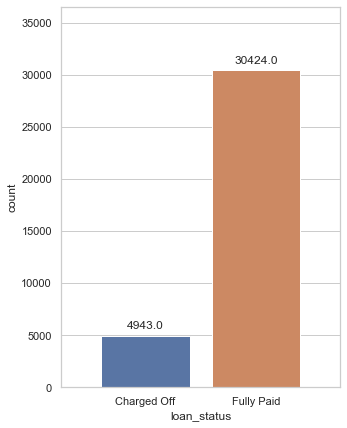

In [32]:
# Plotting Charged Off and Fully Paid Employees Vs Frequency
plt.figure(figsize=(5,7))
plot = sns.countplot(x="loan_status", data=loan_clean)
showLabels(plot)
plt.show()

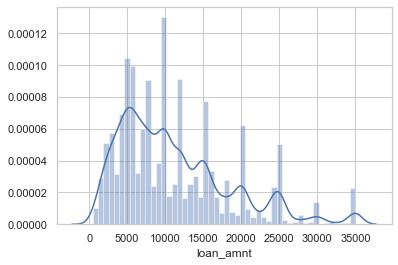

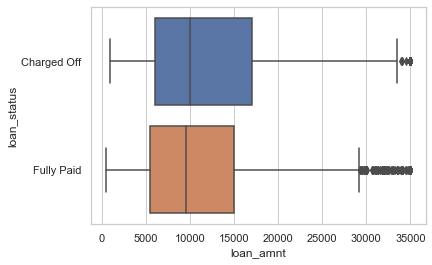

In [33]:
# Plot to understand the distribution of loan amounts with help of dist plot
sns.distplot(loan_clean["loan_amnt"])
plt.show()
sns.boxplot(x=loan_clean["loan_amnt"], y=loan_clean['loan_status'], data=loan_clean)
plt.show()

#Insight: We can see that the density of loans is more when loan is a multiple of 5000
# Rate of loan approval is low as amount increases.

In [34]:
#Understanding the mean, median for Charged_Off and Fully Paid Category
loan_clean.groupby("loan_status")["loan_amnt"].describe()
#Insights
#We are not doing any outlier treatment since ~ 35000USD is an acceptable amount.
# Mean for both charged off and Fully paid is greater than it's median which indicates rightward skew.
# Most loans are in the range of 15000 which is 75th percentile 

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


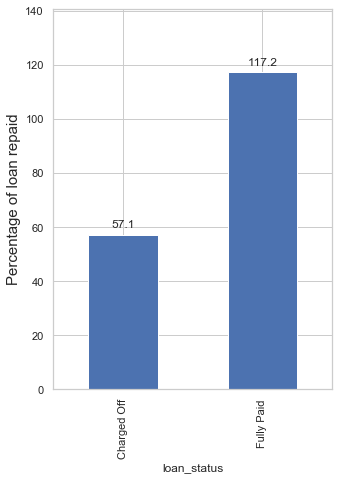

In [35]:
# Calculating the percentage of returns of loans for Lending Club
plt.figure(figsize=(5,7))
plot = (loan_clean.groupby('loan_status').total_pymnt.sum() * 100 / loan_clean.groupby('loan_status').loan_amnt.sum()).plot.bar()
plot.set_ylabel('Percentage of loan repaid', fontsize=15)
plt.margins(0.2, 0.2)
showLabels(plot)
# What is the loss because of Charged Off
# What is the profit because of Fully Paid
# What is the net loss/ profit. And decide a threshold for max loss allowed.


In [36]:
#Creating a categorical variable that categorises the loan amount
loan_clean['Loan_Category'] = pd.qcut(loan_clean.loan_amnt, [0,0.2,0.4,0.6,0.8,1], ["VL","L","M","H","VH"])

In [37]:
pd.pivot_table(data=loan_clean, index="loan_status", columns = "Loan_Category", aggfunc="size", fill_value=0)

Loan_Category,VL,L,M,H,VH
loan_status,,,,,
Charged Off,1095,849,719,1000,1280
Fully Paid,7337,6201,5048,6109,5729


In [38]:
loan_clean.groupby("loan_status")["Loan_Category"].value_counts()

loan_status  Loan_Category
Charged Off  VH               1280
             VL               1095
             H                1000
             L                 849
             M                 719
Fully Paid   VL               7337
             L                6201
             H                6109
             VH               5729
             M                5048
Name: Loan_Category, dtype: int64

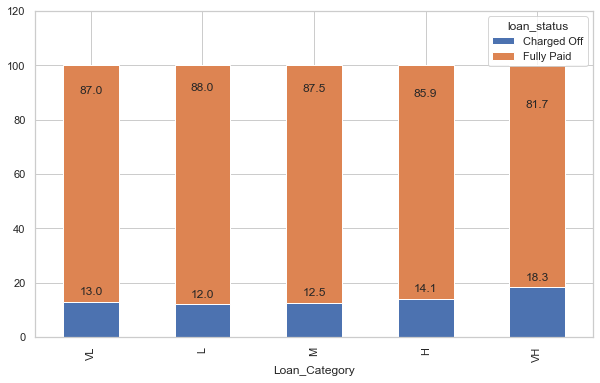

In [39]:
#Finding the proportion of Charged_Off and Fully_Paid in Loan Category
loan_category_var = pd.pivot_table(data=loan_clean, index="Loan_Category", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#We can observe that percentage of Charged_Off statistically increases with each Loan_Category which means loans
# with very high amount are mostly charged off and hence should be careful while approving loans with higher amounts.

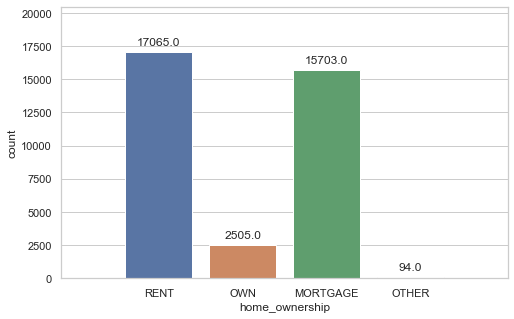

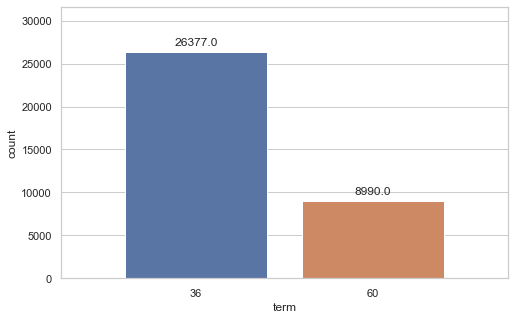

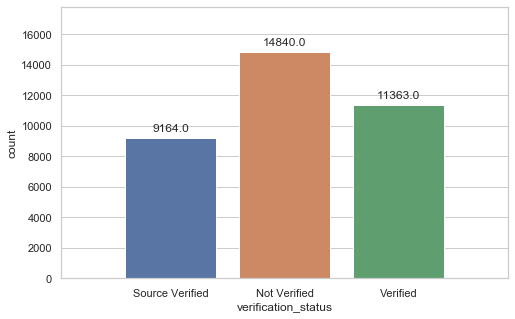

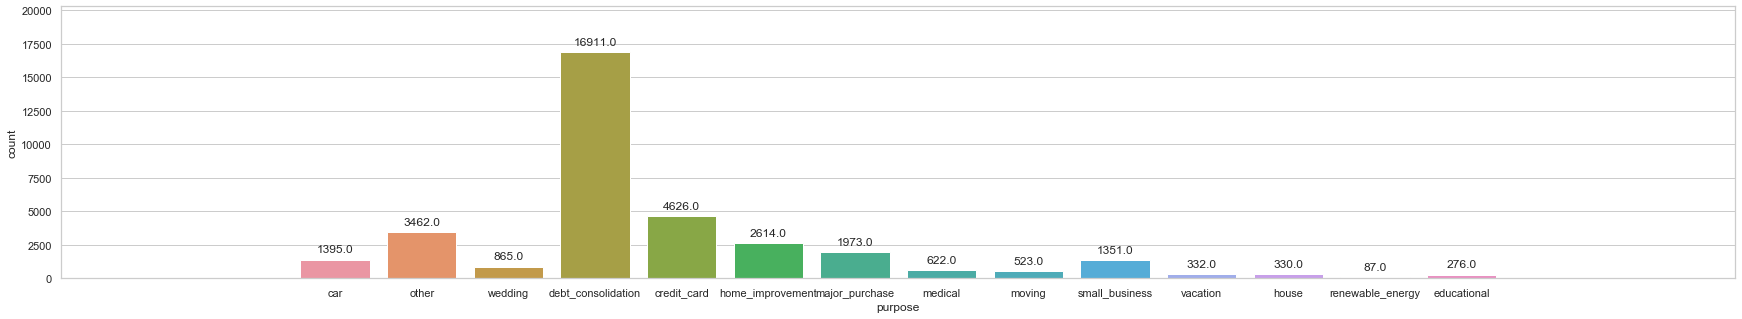

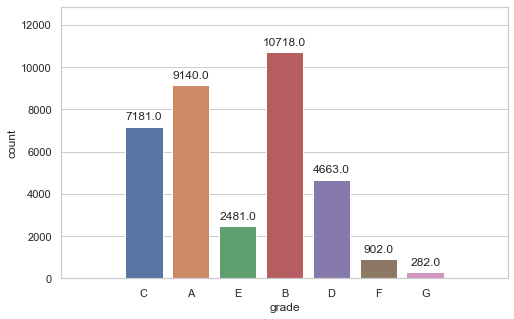

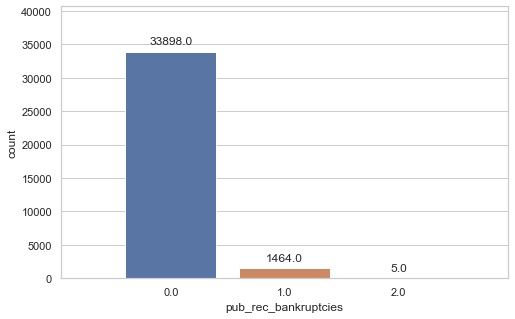

In [40]:
#Check other variables for analysis
plt.figure(figsize=(8,5))
plot = sns.countplot(x="home_ownership", data=loan_clean)
showLabels(plot)
plt.show()

plt.figure(figsize=(8,5))
plot = sns.countplot(x="term", data=loan_clean)
showLabels(plot)
plt.show()

plt.figure(figsize=(8,5))
plot = sns.countplot(x="verification_status", data=loan_clean)
showLabels(plot)
plt.show()

plt.figure(figsize=(30,5))
plot = sns.countplot(x="purpose", data=loan_clean)
showLabels(plot)
plt.show()

plt.figure(figsize=(8,5))
plot = sns.countplot(x="grade", data=loan_clean)
showLabels(plot)
plt.show()

plt.figure(figsize=(8,5))
plot = sns.countplot(x="pub_rec_bankruptcies", data=loan_clean)
showLabels(plot)
plt.show()

#Insights
#home_ownership: Max loans are taken by Rented/ Mortgage category employees
#term: 75% of the loans belong to 36 month tenure period. 
#verification_status: Most of the loans are coming under Not Verified status.
#purpose: debt_consolidation is by far the largest 'purpose' for seeking a loan
#grade: The rate of approval is seen to be statistically decreasing from A to G (B, A, C, D, E, F, G)
#pub_rec_bankruptcies: Very few loans are extended to people with prior record of bankruptcy

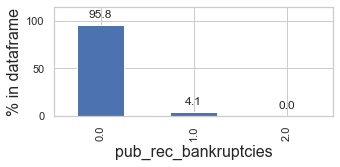

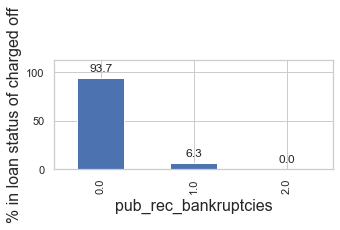

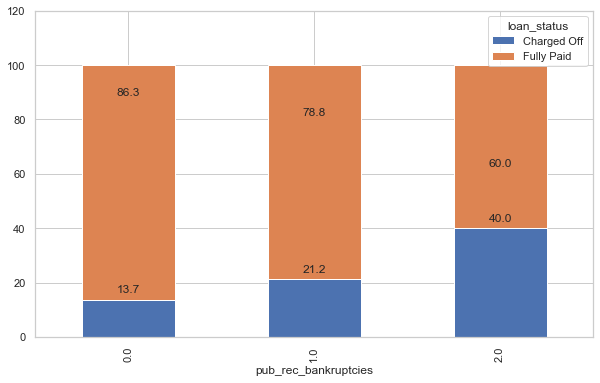

In [41]:
#Variable pub_rec_bankruptcies
plt.figure(figsize=(5,2))
pub_rec = (100*(loan_clean['pub_rec_bankruptcies'].value_counts()/len(loan_clean.loan_status))).plot.bar()
pub_rec.set_ylabel('% in dataframe', fontsize=16)
pub_rec.set_xlabel('pub_rec_bankruptcies', fontsize=16)
showLabels(pub_rec)

plt.figure(figsize=(5,2))
pub_rec = (100*(loan_clean[loan_clean['loan_status']=='Charged Off']['pub_rec_bankruptcies'].value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
pub_rec.set_ylabel('% in loan status of charged off', fontsize=16)
pub_rec.set_xlabel('pub_rec_bankruptcies', fontsize=16)
showLabels(pub_rec)

variable_category_var = pd.pivot_table(data=loan_clean, index="pub_rec_bankruptcies", columns = "loan_status", aggfunc="size", fill_value=0)
variable_category_proportions = variable_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = variable_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

# Insight:
#pub_rec_bankruptcies: Very few loans are extended to people with prior record of bankruptcy. About 40% and 20% of loans are Charged off with employees having 2 and 1 recorded bankruptcies.



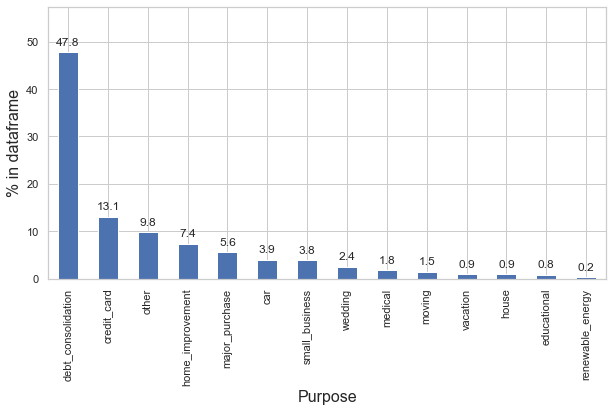

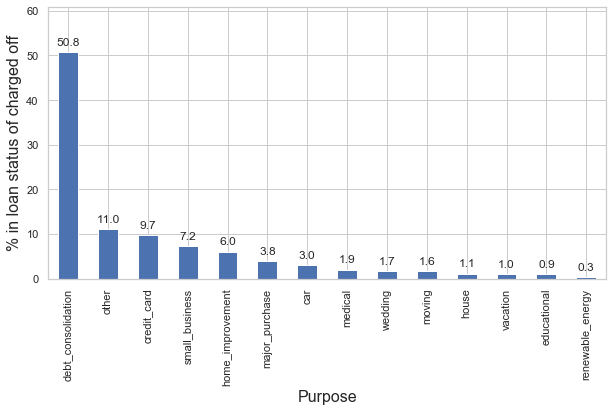

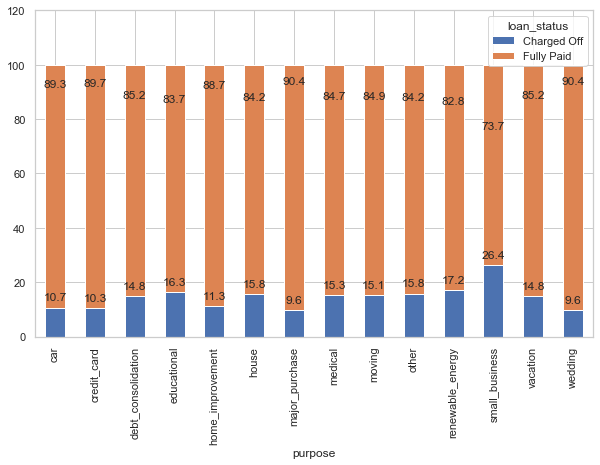

In [42]:
#variable purpose
plt.figure(figsize=(10,5))
purpose = (100*(loan_clean.purpose.value_counts()/len(loan_clean.loan_status))).plot.bar()
purpose.set_ylabel('% in dataframe', fontsize=16)
purpose.set_xlabel('Purpose', fontsize=16)
showLabels(purpose)

plt.figure(figsize=(10,5))
purpose = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].purpose.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
purpose.set_ylabel('% in loan status of charged off', fontsize=16)
purpose.set_xlabel('Purpose', fontsize=16)
showLabels(purpose)

variable_category_var = pd.pivot_table(data=loan_clean, index="purpose", columns = "loan_status", aggfunc="size", fill_value=0)
variable_category_proportions = variable_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = variable_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

##Insights
#purpose: debt_consolidation is by far the largest 'purpose' for seeking a loan. About 50% of charged off loans belong to debt_consolidation category. Highest charge off rate is topped by Small Business, Renewable Energy, Education loans. 


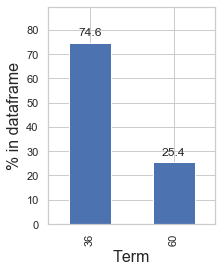

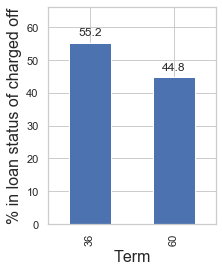

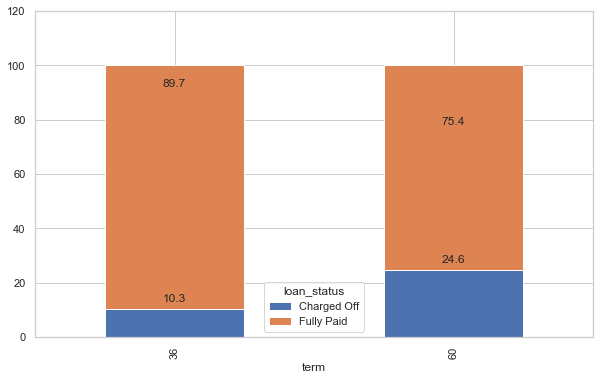

In [43]:
#variable term
loan_clean.groupby("loan_status")["term"].value_counts()

plt.figure(figsize=(3,4))
term = (100*(loan_clean.term.value_counts()/len(loan_clean.loan_status))).plot.bar()
term.set_ylabel('% in dataframe', fontsize=16)
term.set_xlabel('Term', fontsize=16)
showLabels(term)

plt.figure(figsize=(3,4))
term = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].term.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
term.set_ylabel('% in loan status of charged off', fontsize=16)
term.set_xlabel('Term', fontsize=16)
showLabels(term)

variable_category_var = pd.pivot_table(data=loan_clean, index="term", columns = "loan_status", aggfunc="size", fill_value=0)
variable_category_proportions = variable_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = variable_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#Observation:

#term: 75% of the loans belong to 36 month tenure period.
#About 55% of charged off loans belong to 36 month tenure and 45% percent belong to 60 month tenure.
#For 36 month tenure loans, only 10.3% loans belong to Charged Off category. 
#For 60 month tenure, almost 25% of loans are charged off which is 1/4th .



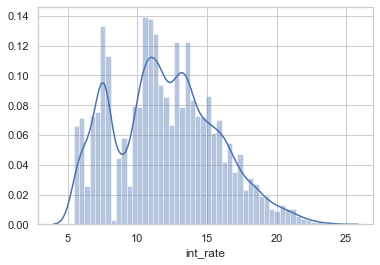

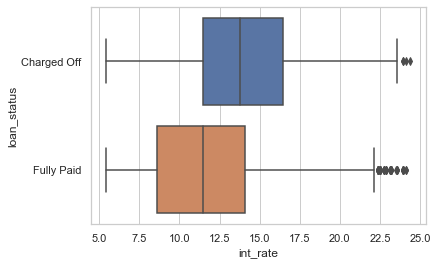

In [44]:
#Variable int_rate
sns.distplot(loan_clean["int_rate"])
plt.show()
sns.boxplot(x=loan_clean["int_rate"], y=loan_clean['loan_status'], data=loan_clean)
plt.show()


In [45]:
loan_clean.groupby("loan_status")["int_rate"].describe()

#Observation:
#Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
#The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more -

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


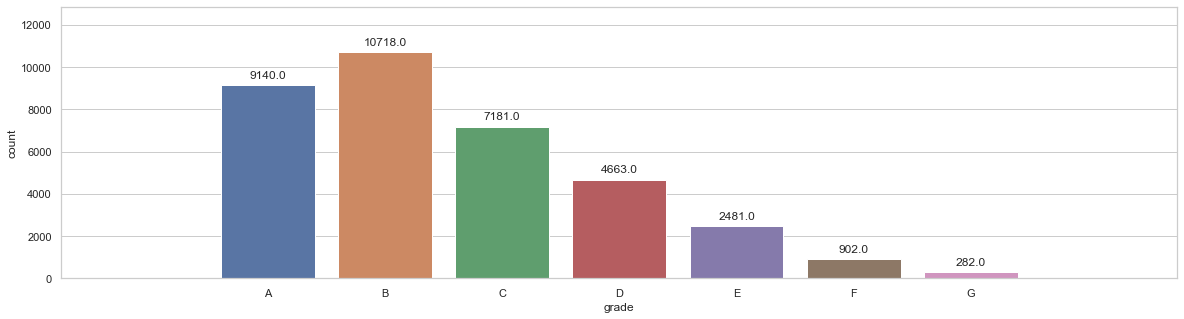

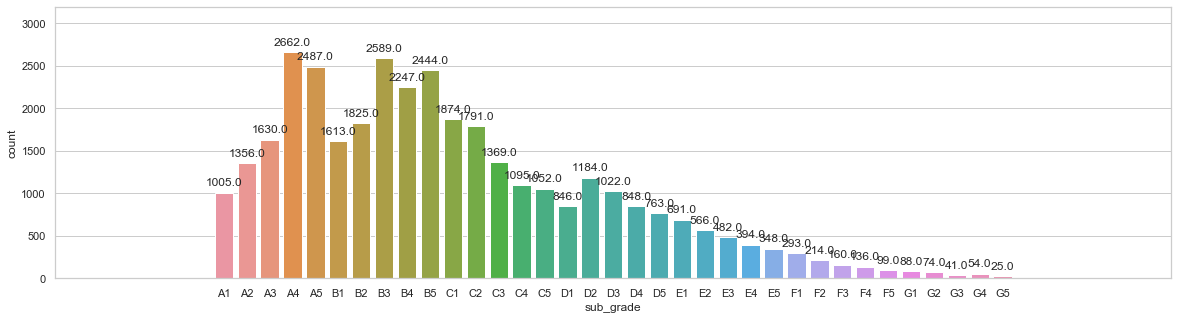

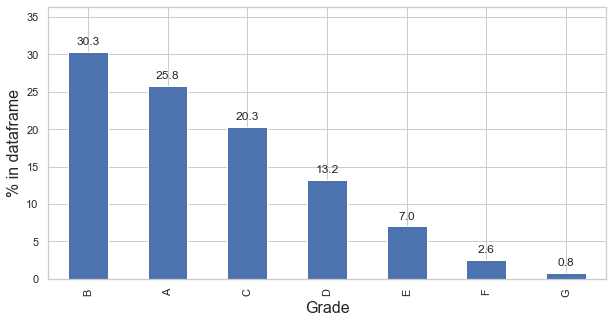

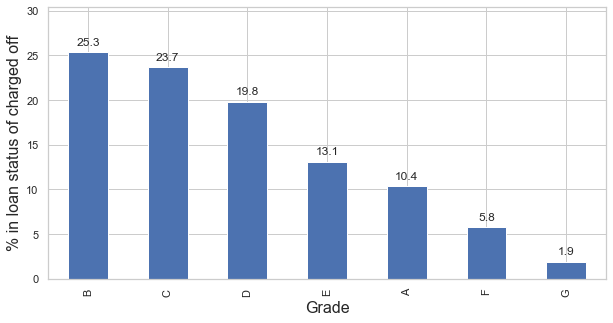

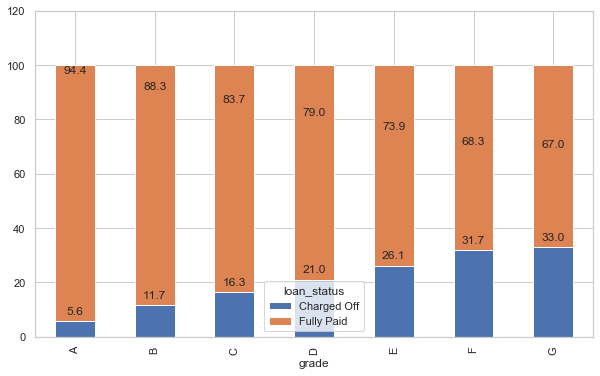

In [46]:
#Variable grade and sub_grade

plt.figure(figsize=(20,5))
plot = sns.countplot(x="grade", data=loan_clean,order=sorted(loan_clean.grade.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(20,5))
plot = sns.countplot(x="sub_grade", data=loan_clean, order=sorted(loan_clean.sub_grade.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(10,5))
g = (100*(loan_clean.grade.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('Grade', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].grade.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('Grade', fontsize=16)
showLabels(g)

variable_category_var = pd.pivot_table(data=loan_clean, index="grade", columns = "loan_status", aggfunc="size", fill_value=0)
variable_category_proportions = variable_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = variable_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#Observation
#grade: The rate of approval is seen to be statistically decreasing from A to G (B, A, C, D, E, F, G). The rate of Charged Off loans increases statistically from A to G (A being the safest and G being the riskiest). 


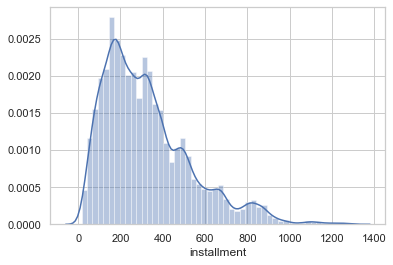

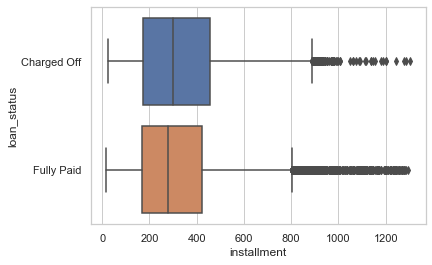

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


In [47]:
#Variable installment
sns.distplot(loan_clean["installment"])
plt.show()
sns.boxplot(x=loan_clean["installment"], y=loan_clean['loan_status'], data=loan_clean)
plt.show()
loan_clean.groupby("loan_status")["installment"].describe()

#Observation:
#installment amount varies largely between 170.08 to 420 with median of 280
#loans Charged Off have high installment on average

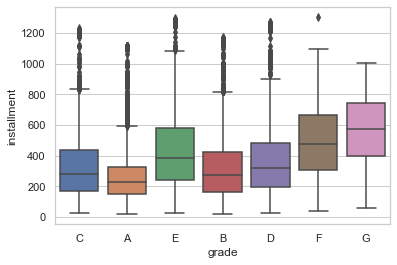

In [48]:
sns.boxplot(y=loan_clean["installment"], x=loan_clean['grade'], data=loan_clean)
plt.show()
#Here we see that Lending Club is, correctly, charging higher installments for lower grade loans.

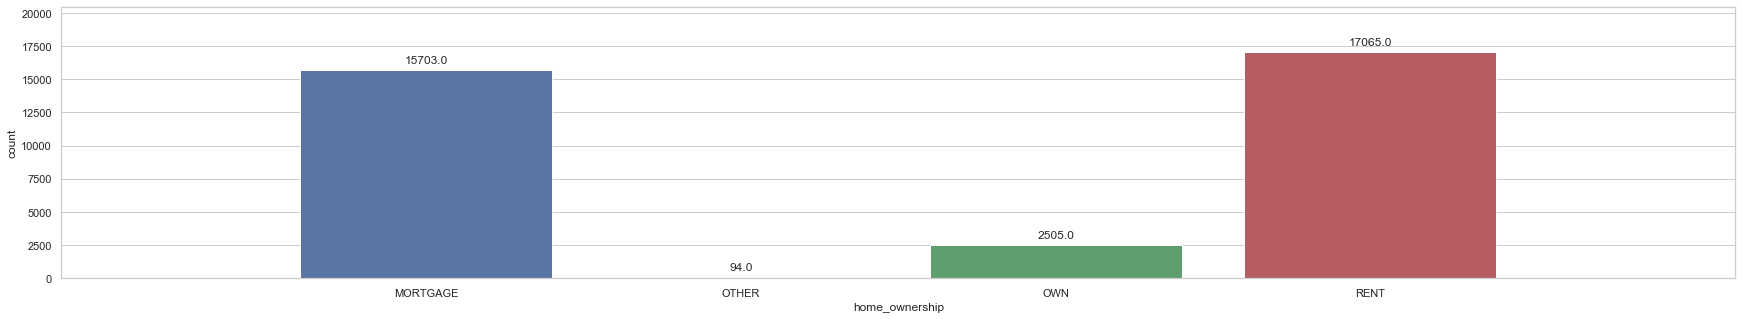

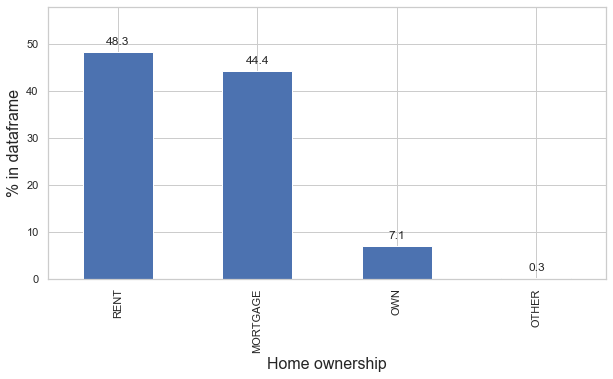

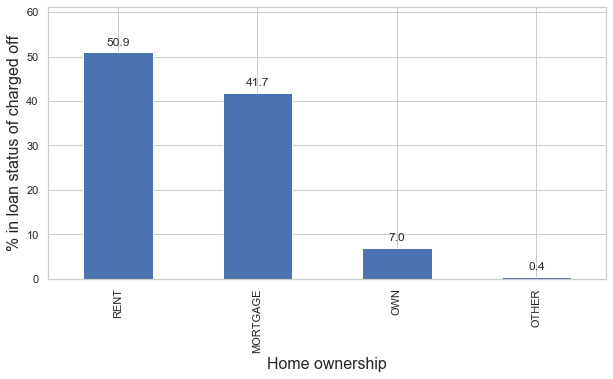

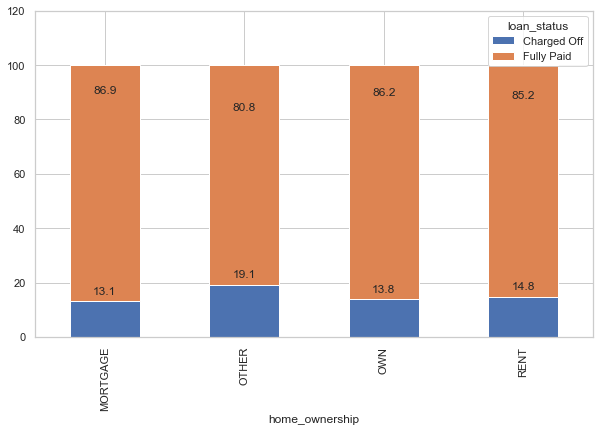

In [49]:
#Variable home_ownership
plt.figure(figsize=(30,5))
plot = sns.countplot(x="home_ownership", data=loan_clean, order=sorted(loan_clean.home_ownership.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(10,5))
g = (100*(loan_clean.home_ownership.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('Home ownership', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].home_ownership.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('Home ownership', fontsize=16)
showLabels(g)

variable_category_var = pd.pivot_table(data=loan_clean, index="home_ownership", columns = "loan_status", aggfunc="size", fill_value=0)
variable_category_proportions = variable_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = variable_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#Insights:
#home_ownership: Mortgage and Own seem to be the safest category with 13.8% charged off percent followed by Rent and Other with 14.8% and whopping 19.1% respectively.


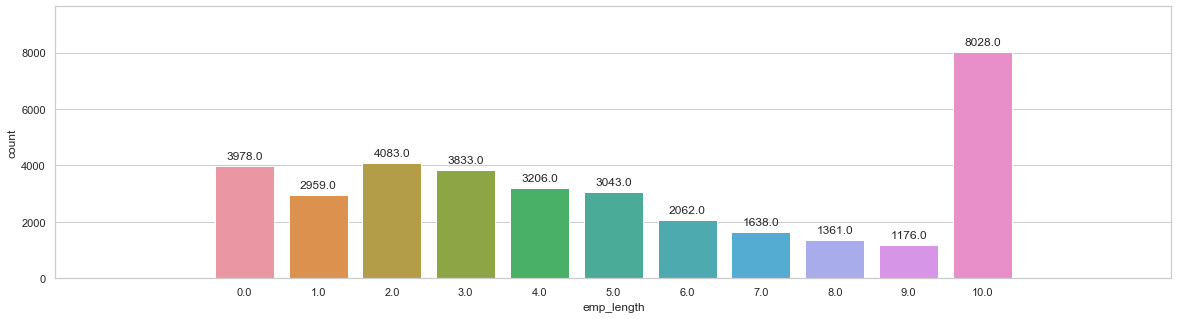

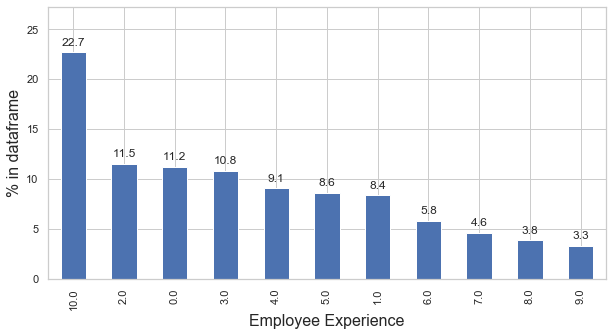

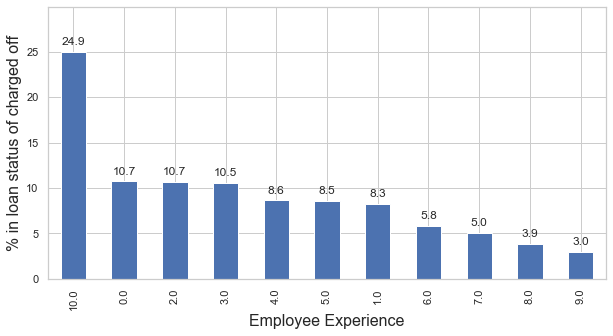

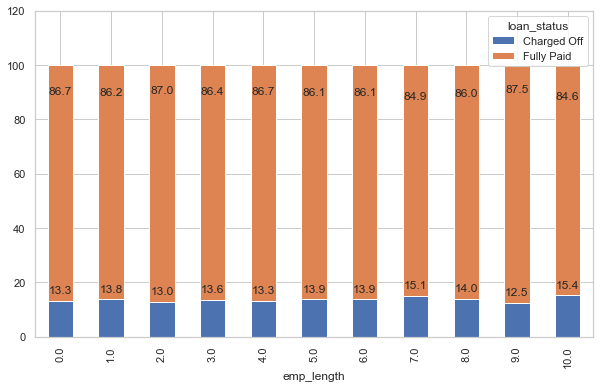

In [50]:
#variable emp length
plt.figure(figsize=(20,5))
plot = sns.countplot(x="emp_length", data=loan_clean, order=sorted(loan_clean.emp_length.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(10,5))
g = (100*(loan_clean.emp_length.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('Employee Experience', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].emp_length.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('Employee Experience', fontsize=16)
showLabels(g)

variable_category_var = pd.pivot_table(data=loan_clean, index="emp_length", columns = "loan_status", aggfunc="size", fill_value=0)
variable_category_proportions = variable_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = variable_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)


#Insights: We see that almost 22% of records belong to people with 10+ years experience. The percentage of charged off seems to be the highest for 10+ years employees with 15.4% followed by 7 year experienced employees


In [51]:
#variable annual_inc
loan_clean.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [52]:
loan_clean.annual_inc.value_counts()

60000.0    1331
50000.0     932
40000.0     780
45000.0     745
65000.0     735
           ... 
51646.0       1
87700.0       1
61152.0       1
43452.0       1
8472.0        1
Name: annual_inc, Length: 4831, dtype: int64

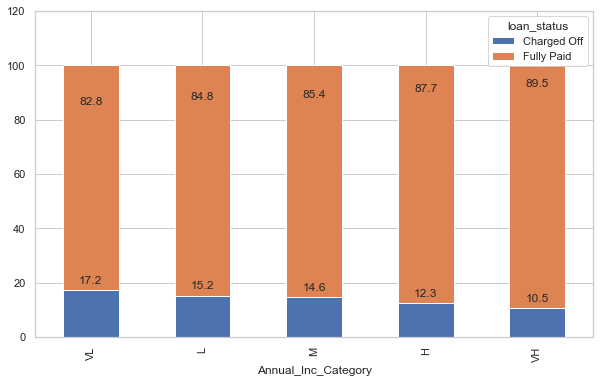

In [53]:
#Creating a categorical variable that categorises the Annual Income
loan_clean['Annual_Inc_Category'] = pd.qcut(loan_clean.annual_inc, [0,0.2,0.4,0.6,0.8,1], ["VL","L","M","H","VH"])
loan_category_var = pd.pivot_table(data=loan_clean, index="Annual_Inc_Category", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#Insights: We see that the Charged Off percent keeps statistically decreasing as income is increasing.

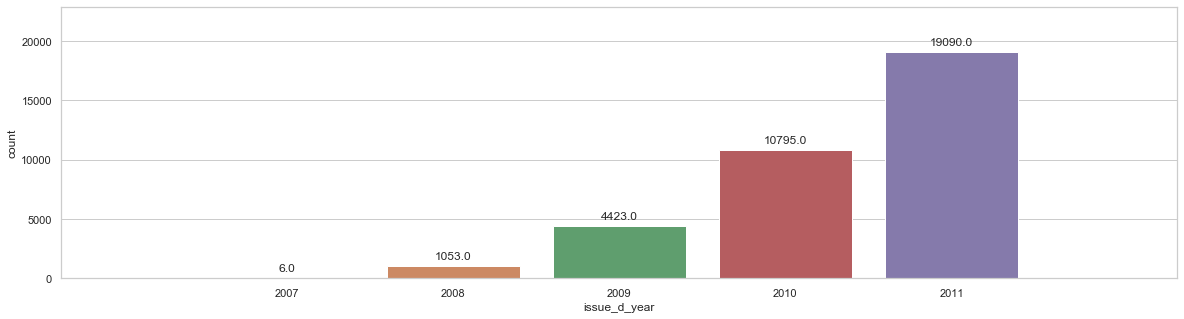

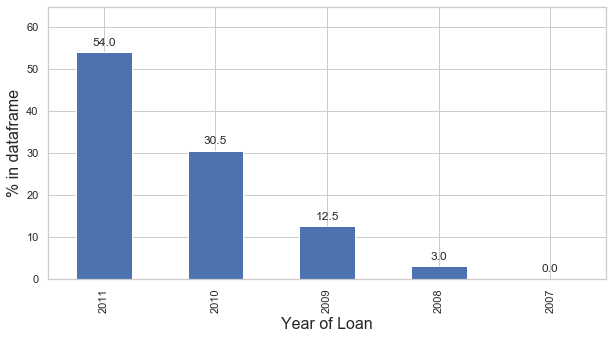

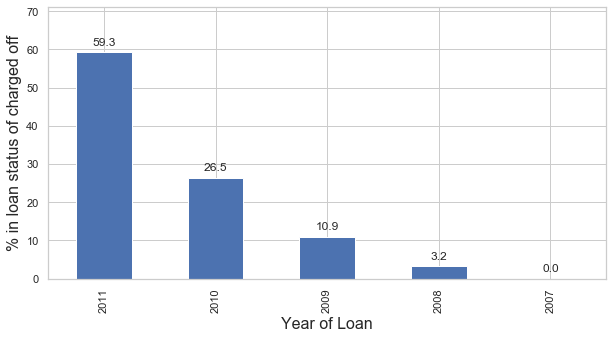

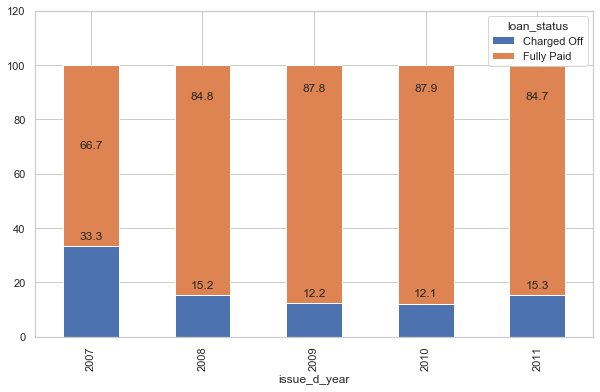

In [54]:
#variable issue_d
##issue_year
plt.figure(figsize=(20,5))
plot = sns.countplot(x="issue_d_year", data=loan_clean, order=sorted(loan_clean.issue_d_year.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(10,5))
g = (100*(loan_clean.issue_d_year.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('Year of Loan', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].issue_d_year.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('Year of Loan', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="issue_d_year", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#Insights
# We can see that number of loans are exponentially increasing year by year which is a good thing as LC is getting more number of customers
# The charged off rate is comparitively higher in 2011 compared to rest with an increase of 3% from previous years


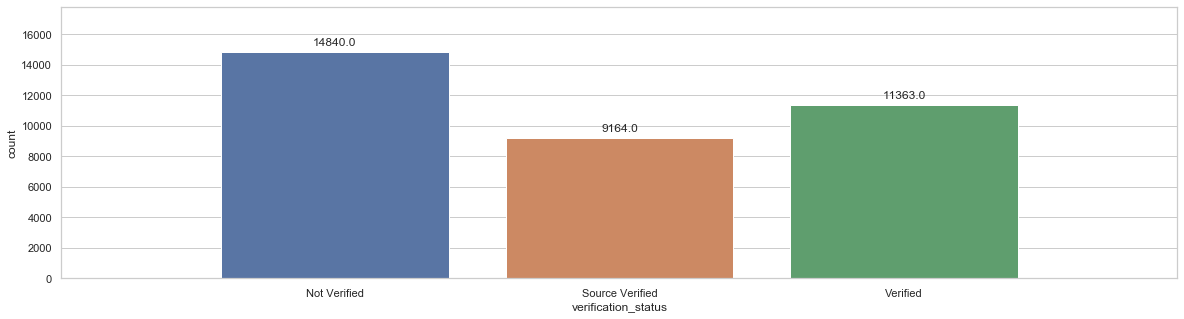

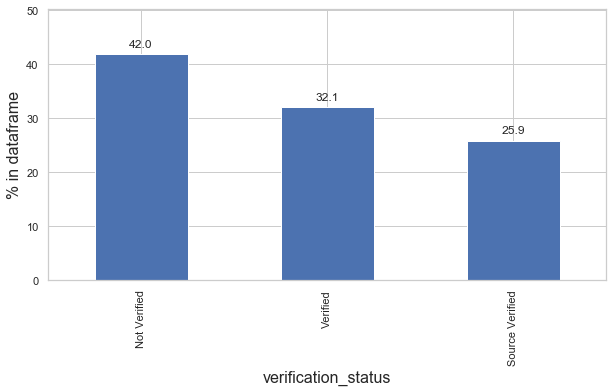

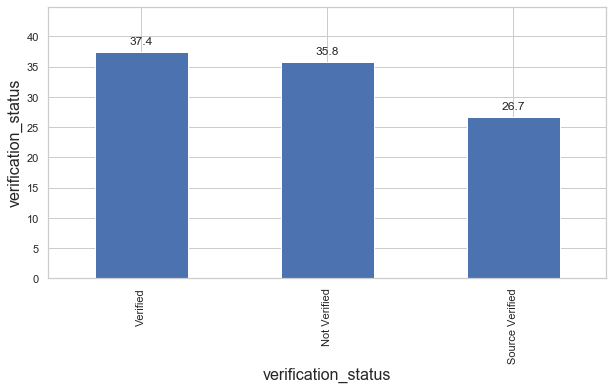

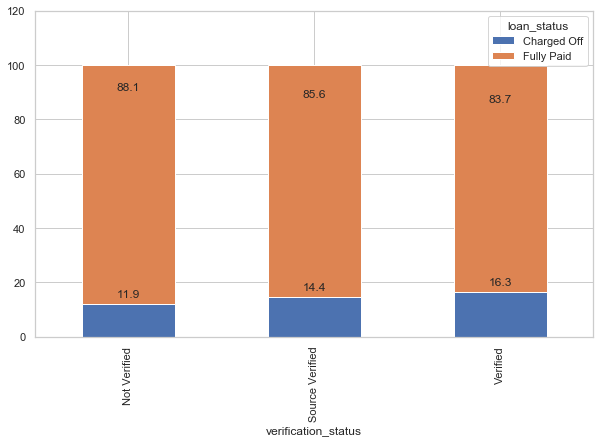

In [55]:
#Variable verification_status
plt.figure(figsize=(20,5))
plot = sns.countplot(x="verification_status", data=loan_clean, order=sorted(loan_clean.verification_status.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(10,5))
g = (100*(loan_clean.verification_status.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('verification_status', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].verification_status.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
g.set_ylabel('verification_status', fontsize=16)
g.set_xlabel('verification_status', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="verification_status", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#Insights: verification_status: Surprisingly, the Charged Off percent is highest for Verified Category. This means LC has to double check the correctness of sources.


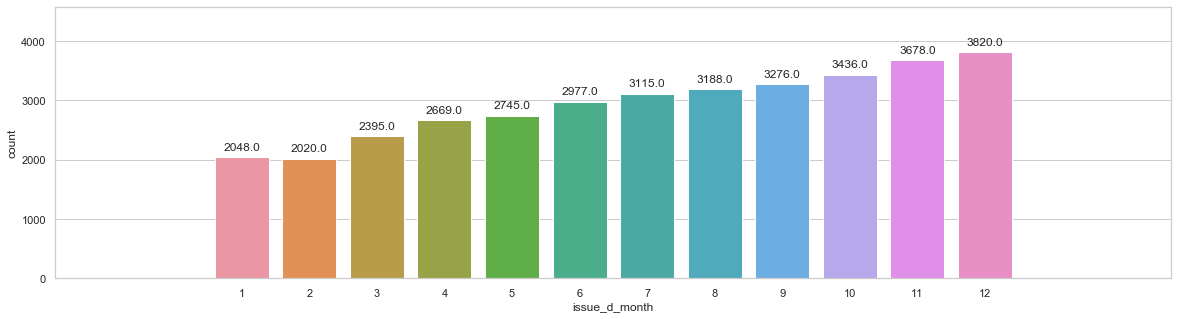

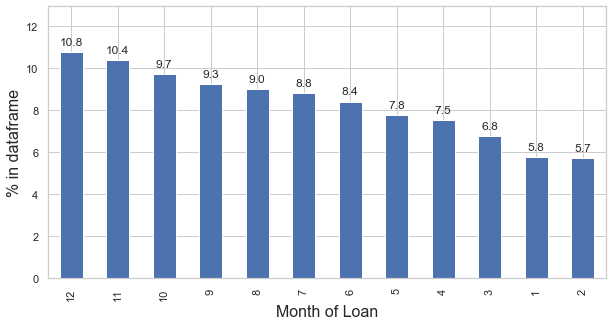

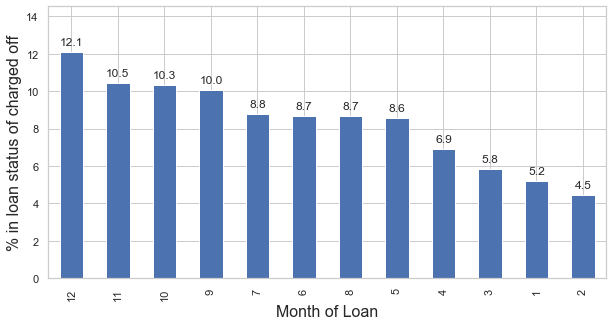

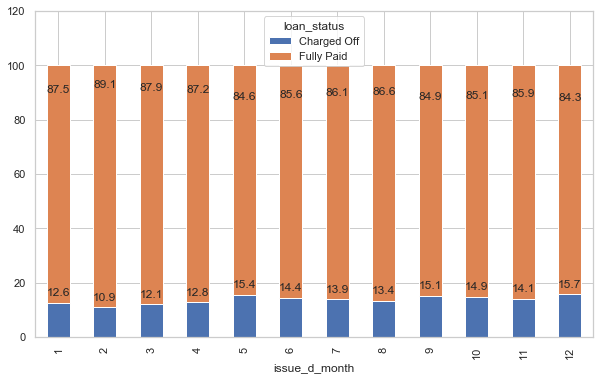

In [56]:
##issue_month
plt.figure(figsize=(20,5))
plot = sns.countplot(x="issue_d_month", data=loan_clean, order=sorted(loan_clean.issue_d_month.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(10,5))
g = (100*(loan_clean.issue_d_month.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('Month of Loan', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].issue_d_month.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].loan_status))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('Month of Loan', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="issue_d_month", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

# We can see that charged off rate highest in 5th, 9th, 12th month of every year.It's always highest in the month of December.

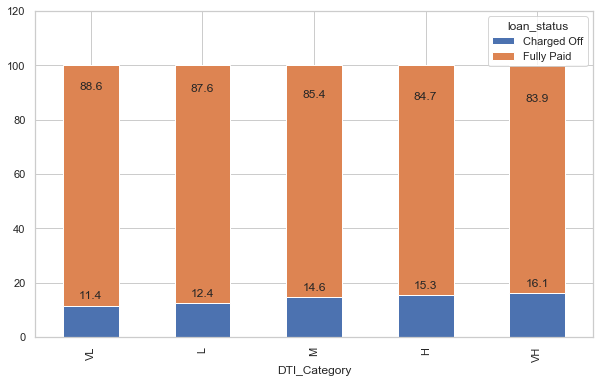

In [57]:
# Variable = dti


#Creating a derived column for DTI
loan_clean['DTI_Category'] = pd.qcut(loan_clean.dti, [0,0.2,0.4,0.6,0.8,1], ["VL","L","M","H","VH"])
loan_category_var = pd.pivot_table(data=loan_clean, index="DTI_Category", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

# Higher the DTI, higher the charged off percent.



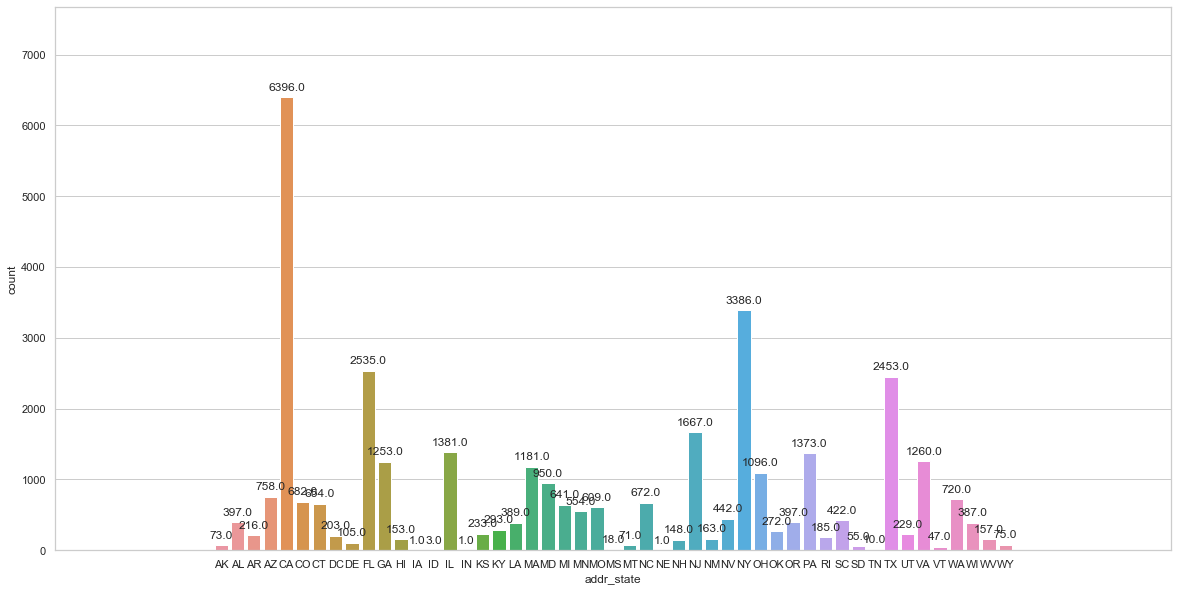

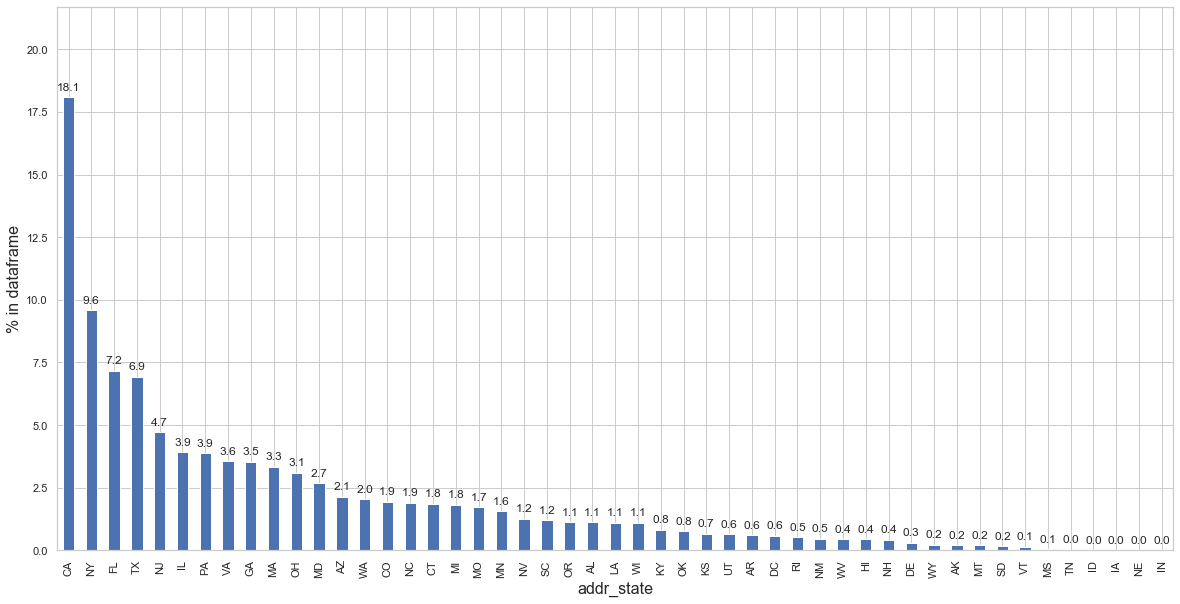

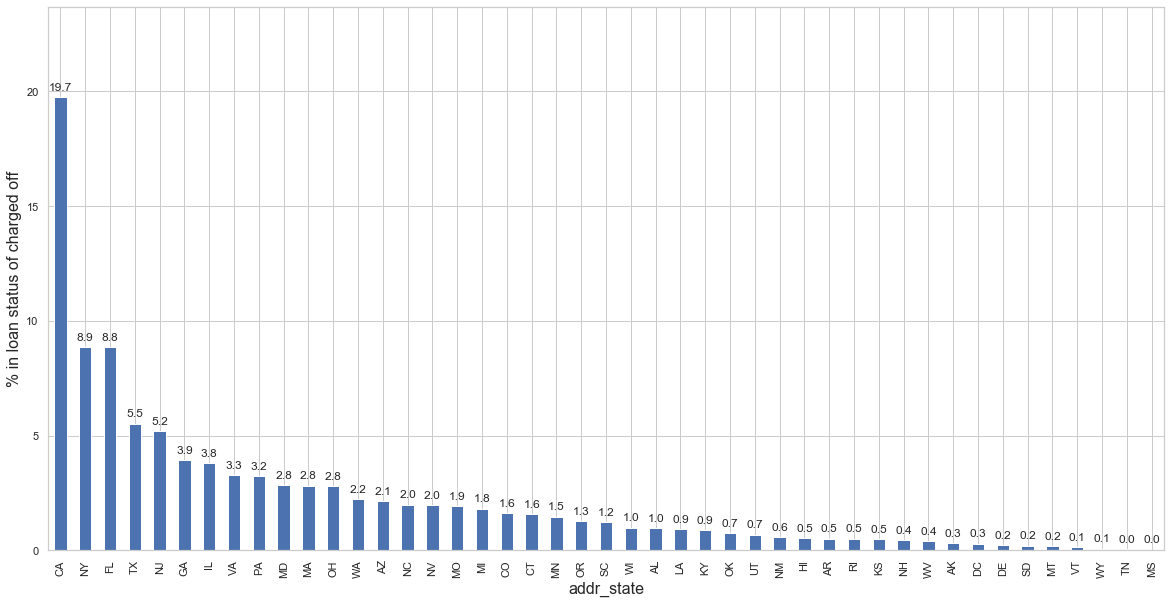

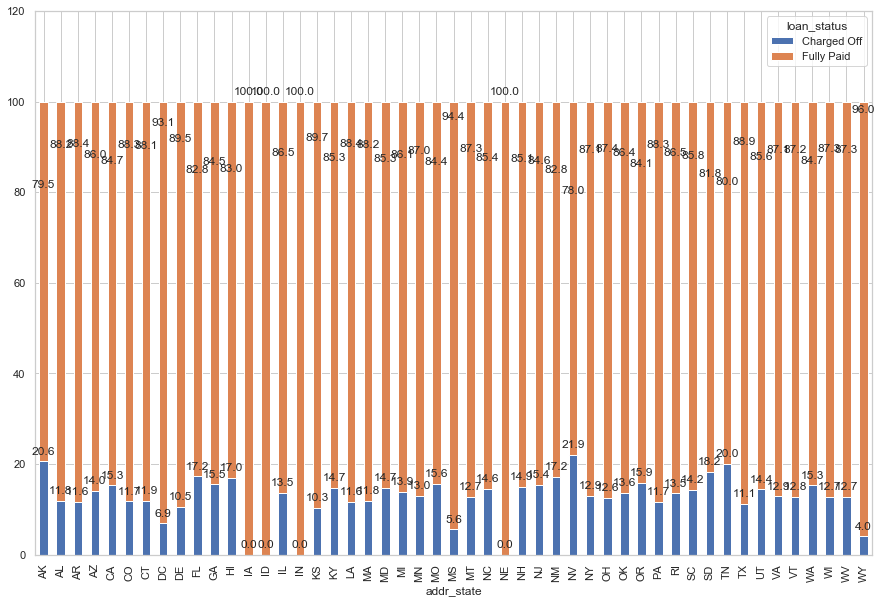

In [58]:

##addr_state
plt.figure(figsize=(20,10))
plot = sns.countplot(x="addr_state", data=loan_clean, order=sorted(loan_clean.addr_state.unique()))
showLabels(plot)
plt.show()

plt.figure(figsize=(20,10))
g = (100*(loan_clean.addr_state.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('addr_state', fontsize=16)
showLabels(g)

plt.figure(figsize=(20,10))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].addr_state.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].addr_state))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('addr_state', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="addr_state", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[15,10])
plt.margins(0.5, 0.5)
showLabels(plot)

#Insights
#We can see that Charged Off rate is too high for some states like AK, NV, TN. LC should consider anything >=20% as a risk.

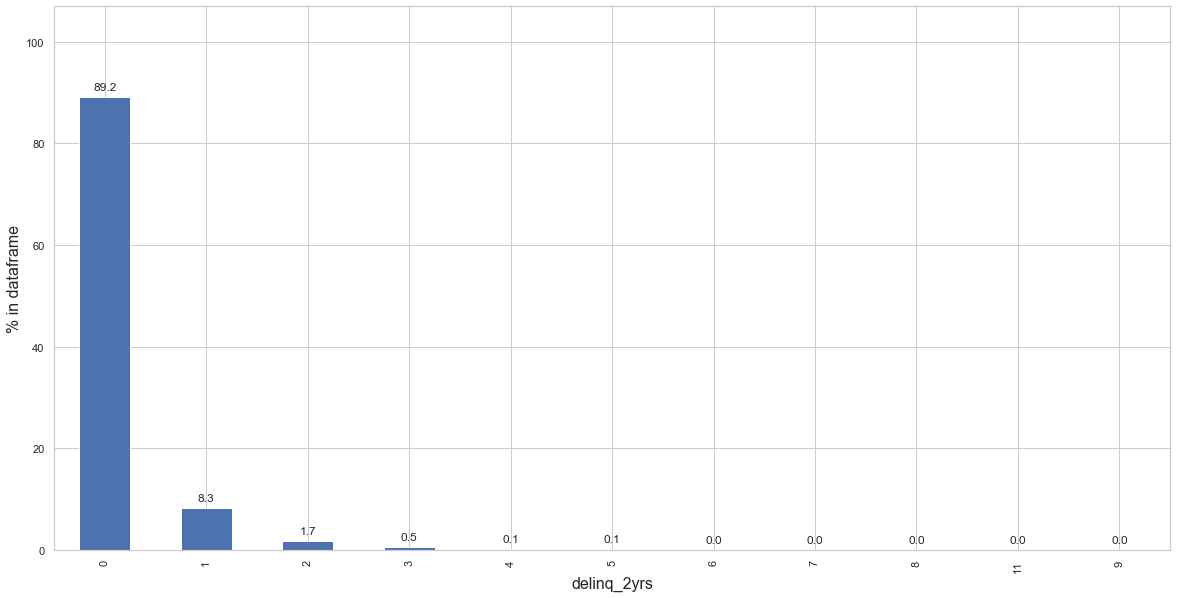

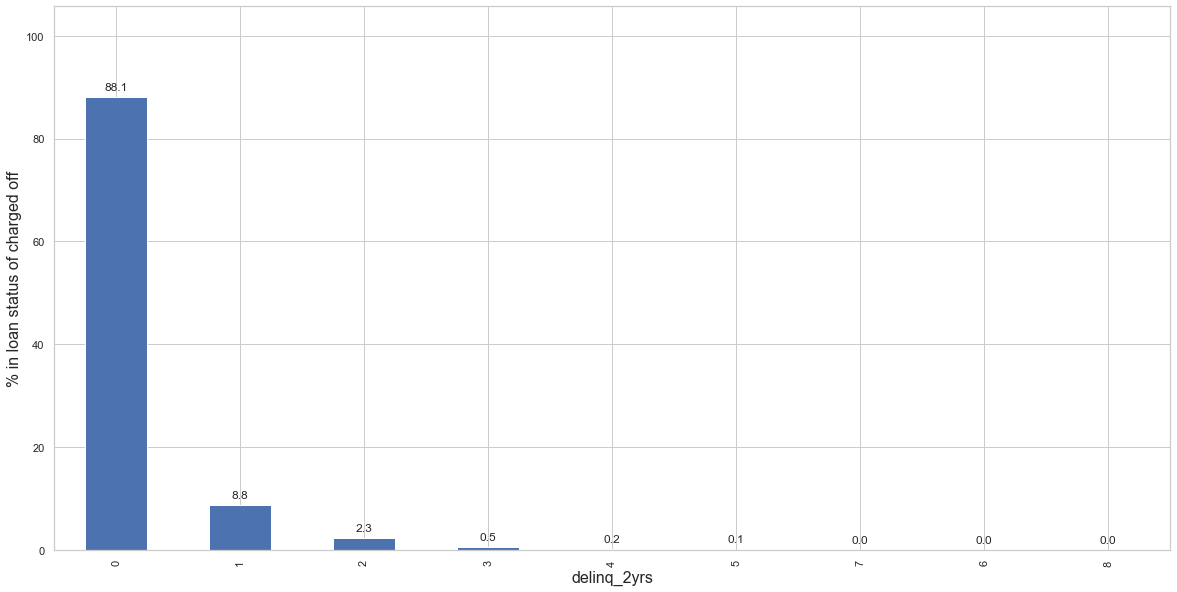

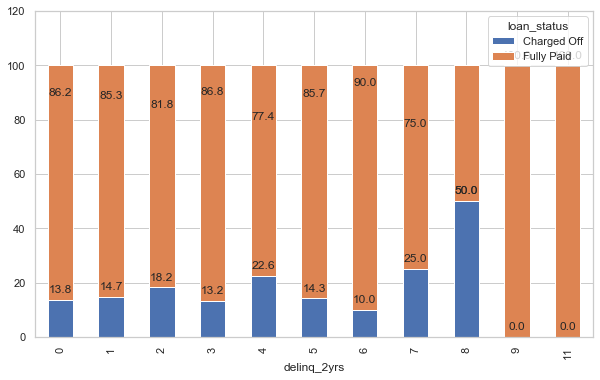

In [59]:
# Variable = delinq_2yrs

plt.figure(figsize=(20,10))
g = (100*(loan_clean.delinq_2yrs.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('delinq_2yrs', fontsize=16)
showLabels(g)

plt.figure(figsize=(20,10))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].delinq_2yrs.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].delinq_2yrs))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('delinq_2yrs', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="delinq_2yrs", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

# We can clearly see that charged off percent is increasing with value of delinq_2yrs

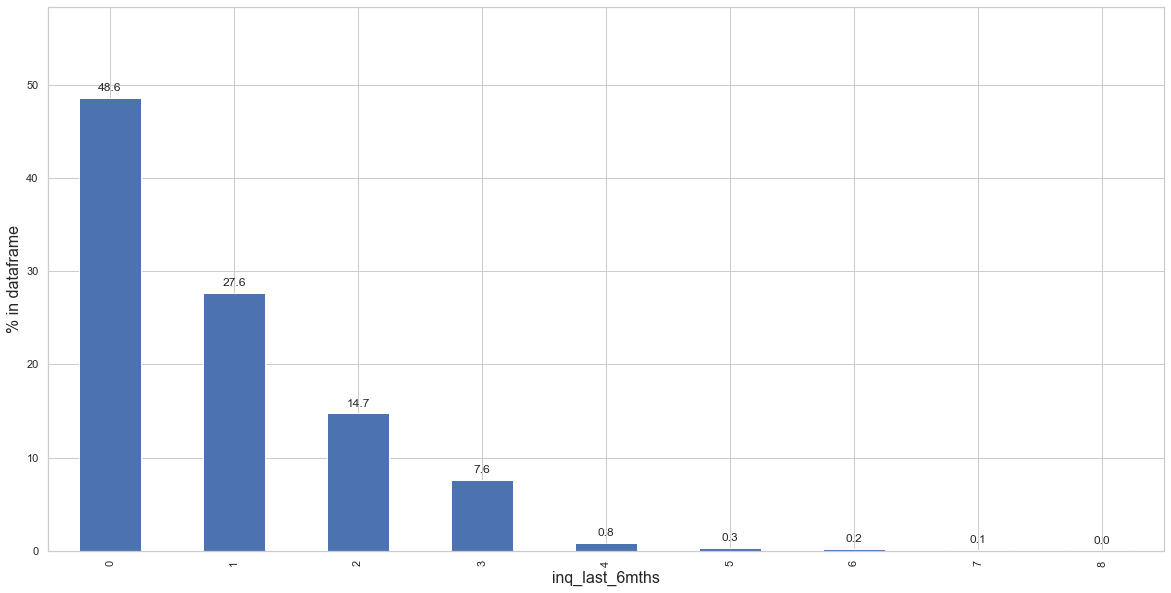

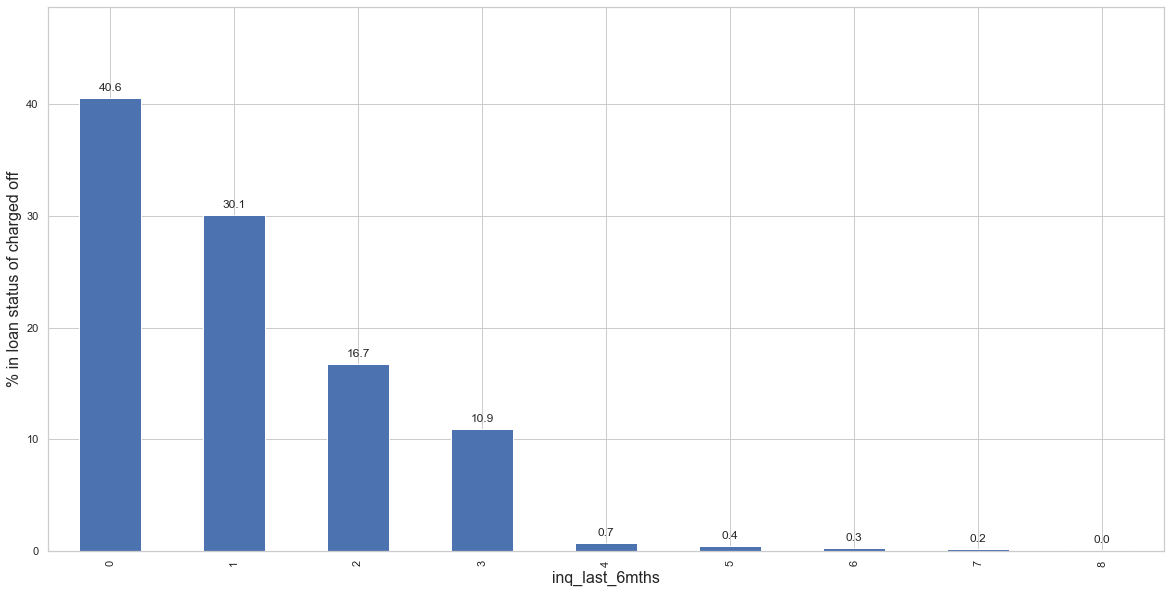

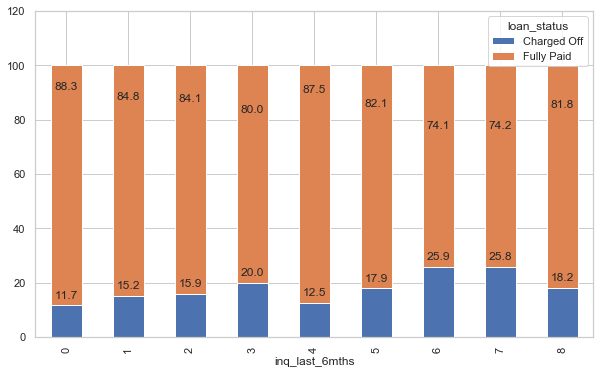

In [60]:
#Variable = inq_last_6mths

plt.figure(figsize=(20,10))
g = (100*(loan_clean.inq_last_6mths.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('inq_last_6mths', fontsize=16)
showLabels(g)

plt.figure(figsize=(20,10))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].inq_last_6mths.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].inq_last_6mths))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('inq_last_6mths', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="inq_last_6mths", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

#We can see that charged off rate is increasing with number of inquiries. 48% didn't inquire at all.

In [61]:
# Variable: open_acc
loan_clean.groupby('loan_status')['open_acc'].describe()

# We see no significant difference wrt to open_acc for Fully Paid and Charged Off

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


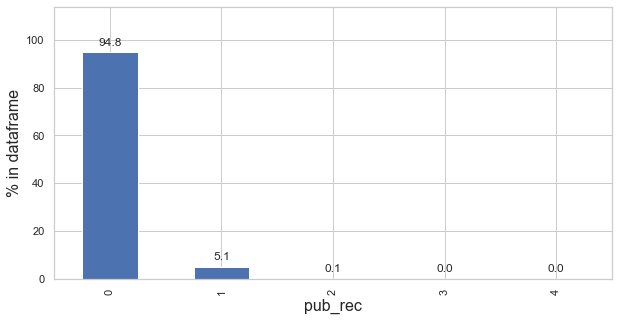

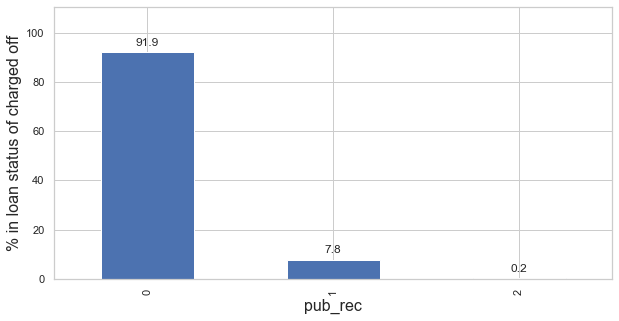

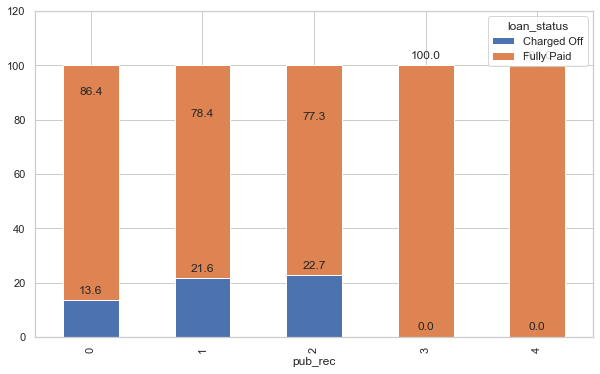

In [62]:
# Variable = pub_rec
plt.figure(figsize=(10,5))
g = (100*(loan_clean.pub_rec.value_counts()/len(loan_clean.loan_status))).plot.bar()
g.set_ylabel('% in dataframe', fontsize=16)
g.set_xlabel('pub_rec', fontsize=16)
showLabels(g)

plt.figure(figsize=(10,5))
g = (100*(loan_clean[loan_clean['loan_status']=='Charged Off'].pub_rec.value_counts()/len(loan_clean[loan_clean['loan_status']=='Charged Off'].pub_rec))).plot.bar()
g.set_ylabel('% in loan status of charged off', fontsize=16)
g.set_xlabel('pub_rec', fontsize=16)
showLabels(g)

loan_category_var = pd.pivot_table(data=loan_clean, index="pub_rec", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

# Borrowers with even 1 derogatory record can significantly increase the charged off percentage.

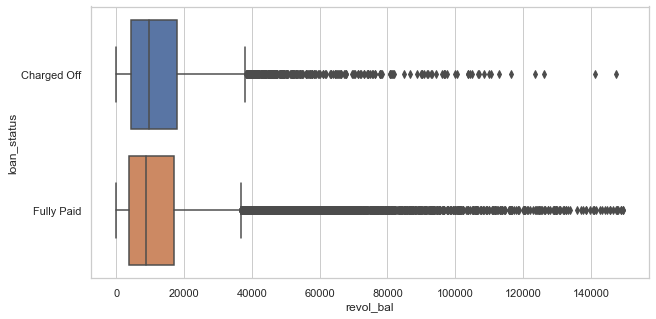

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13680.089824,14768.969553,0.0,4246.5,9562.0,17809.0,147365.0
Fully Paid,30424.0,13316.918847,15820.937992,0.0,3711.0,8833.0,16941.0,149588.0


In [63]:
# Variable = revol_bal
plt.figure(figsize=(10,5))
sns.boxplot(x=loan_clean['revol_bal'], y=loan_clean['loan_status'], data=loan_clean)
plt.show()

loan_clean.groupby('loan_status')['revol_bal'].describe()
# There is no much difference between Fully_Paid and Charged Off wrt revol_bal variable

In [64]:
# Variable = total_acc
loan_clean.groupby('loan_status')['total_acc'].describe()
# There is no much difference between Fully_Paid and Charged Off wrt total_acc variable

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,21.730123,11.438113,2.0,13.0,20.0,29.0,70.0
Fully Paid,30424.0,22.287043,11.395624,3.0,14.0,21.0,29.0,90.0


In [65]:
# Variable = total_pymnt
loan_clean.groupby('loan_status')['total_pymnt'].describe()

#Insight: We can observe that average Charged_Off total payment is quite less than average Fully Paid payment.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,7018.765159,6687.030748,33.73,2320.630,4985.810,9476.9650,51745.45
Fully Paid,30424.0,12833.026290,8853.554413,578.77,6242.355,10820.835,17121.5925,58563.68


In [66]:
# Variable = last_pymnt_amnt
loan_clean.groupby('loan_status')['last_pymnt_amnt'].describe()

#Insight: We can observe that last average Charged_Off payment is quite less than last average Fully Paid payment.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,331.126913,526.178060,0.01,119.3750,244.090,409.4500,12818.38
Fully Paid,30424.0,3216.920187,4749.376481,0.16,263.6625,912.985,4382.0575,36115.20


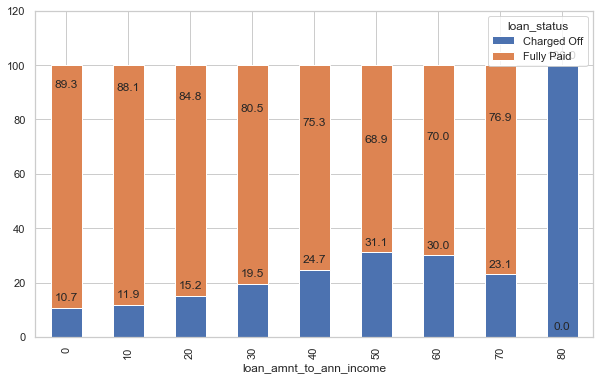

In [67]:
# Creating Derived Variable Loan Amount to Annual Income
loan_clean['loan_amnt_to_ann_income'] = loan_clean['loan_amnt'] * 10/ loan_clean['annual_inc']
loan_clean['loan_amnt_to_ann_income'] = (loan_clean['loan_amnt_to_ann_income'].astype(int))*10

loan_category_var = pd.pivot_table(data=loan_clean, index="loan_amnt_to_ann_income", columns = "loan_status", aggfunc="size", fill_value=0)
loan_category_proportions = loan_category_var[["Charged Off", "Fully Paid"]].apply(lambda x: round(x/x.sum()*100,2), axis=1)
plot = loan_category_proportions.plot(kind="bar", stacked = True, figsize=[10,6])
plt.margins(0.5, 0.5)
showLabels(plot)

# we can see that as the ration increases, the charged off ratio also increases. LC should be careful in lending loans where loan_amnt > 20% of total income

# Bivariate Analysis

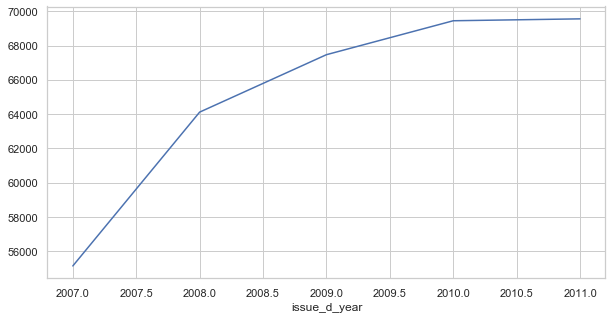

In [68]:
# Issued Year Vs Annual Income
plt.figure(figsize=[10,5])
loan_clean.groupby(['issue_d_year'])['annual_inc'].mean().plot()
plt.show()

# This obseravation matches with the above graph as annual income of borrowers is also increasing exponentially every year.

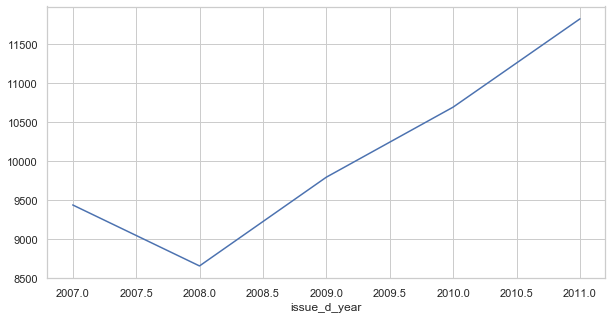

In [69]:
# Issued Year Vs Loan Amount
plt.figure(figsize=[10,5])
loan_clean.groupby(['issue_d_year'])['loan_amnt'].mean().plot()
plt.show()

#We see a sudden dip in the year 2008 for issued loan amount. LC might have faced some economic issues in year 2008.
# The approved amount increases with each year with a positive slope.


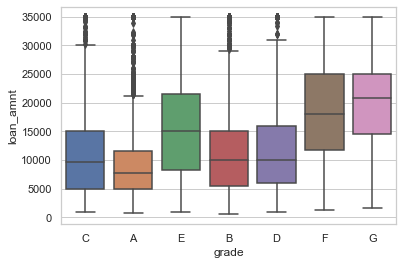

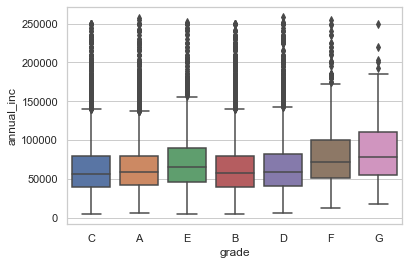

In [70]:
# Plot to understand how loan amount, annual income are related to Grade.
sns.boxplot(loan_clean.grade, loan_clean.loan_amnt)
plt.show()


sns.boxplot(loan_clean.loc[loan_clean['annual_inc']<260000].grade, loan_clean.loc[loan_clean['annual_inc']<260000].annual_inc)
plt.show()

#Insights: From the below graphs, we can clearly understand that grade is related to loan amount. Higher the loan amount, higher is the grade
# Annual income doesn't seem to have any observable effect on Grade


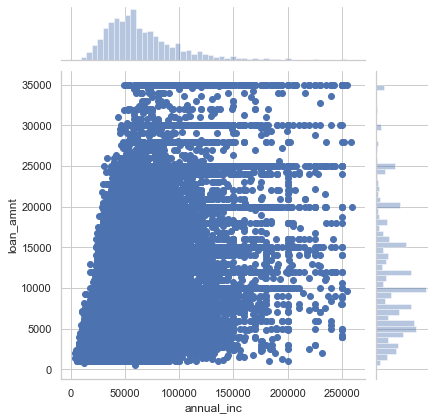

In [71]:
#Plot between annual income and loan amount
sns.jointplot('annual_inc', 'loan_amnt' , loan_clean.loc[loan_clean['annual_inc']<260000])
plt.show()

# We can see high density where borrowers with annual income of ~50000 are approved a loan of more than ~25000. These are risky loans which LC should take care.

[]

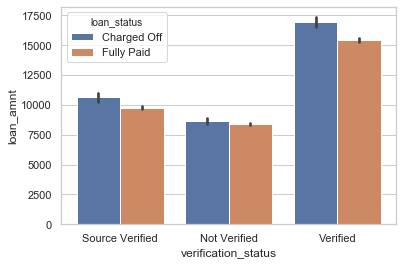

In [72]:
# Loan Amount Vs Verification Status
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_clean)
plt.plot()

# We can see that higher loans are often verified. Loans with higher amounts seem to be risky.

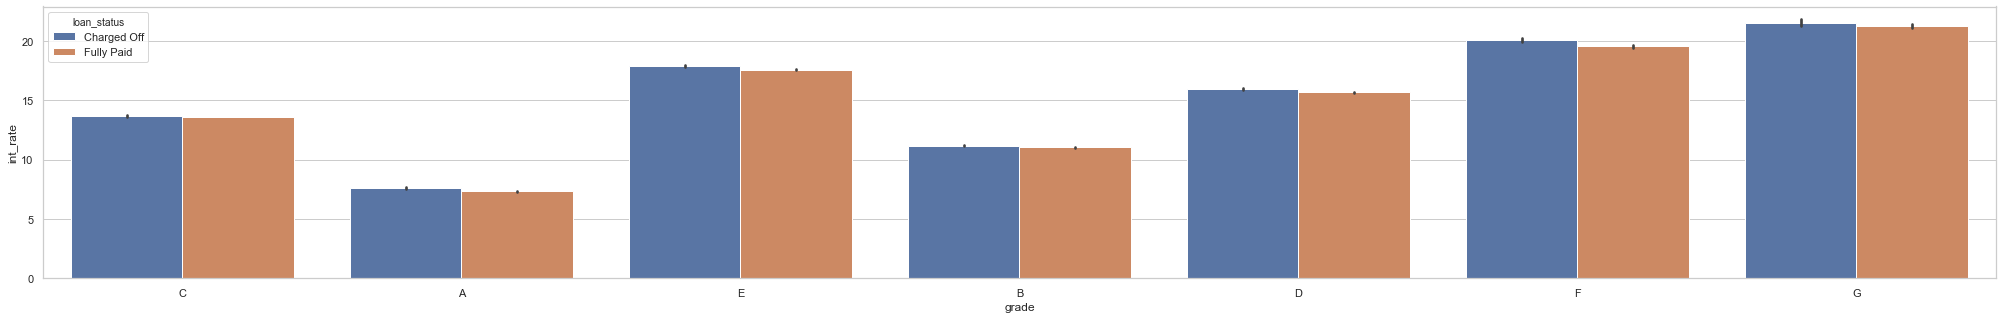

In [73]:
# Plot to understand the relation between interest rate and sub grade
plt.figure(figsize=[35,5])
sns.barplot(x="grade", y="int_rate", hue="loan_status",  data=loan_clean)
plt.show()
#insights: We can see that interest rate increases with increasing in grade.
#also, int rate is almost same for fully paid and charged off for the same grade.


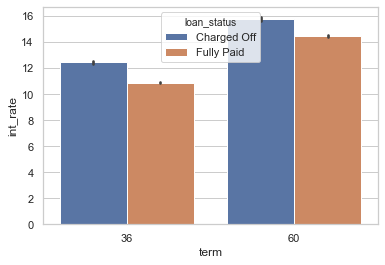

In [74]:
# Plot to understand the relation between term and interest rate
sns.barplot(x="term", y="int_rate", hue="loan_status",  data=loan_clean)
plt.show()

# Inights: We can see that Charged Off rate is higher for borrowers with higher interest rates in both the terms

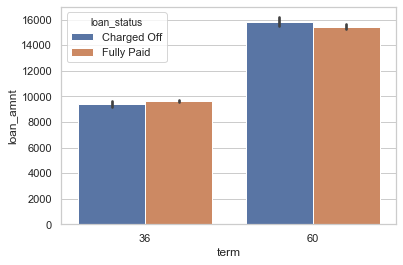

In [75]:
#Loan amount Vs term Vs Loan Status
sns.barplot(x="term", y="loan_amnt", hue="loan_status",  data=loan_clean)
plt.show()
#insights: bigger loans are having higher terms.  

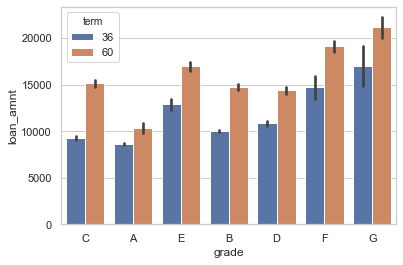

In [76]:
#Loan amount vs Grade vs Term
sns.barplot(x="grade", y="loan_amnt", hue="term",  data=loan_clean)
plt.show()
#insights: the loan amount is significally higher for 5 year term with incresing in higher grades.

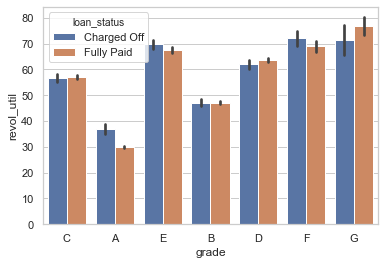

In [77]:
#revol_util vs Grade
sns.barplot(x="grade", y="revol_util", hue="loan_status", data=loan_clean)
plt.show()
#insights:with increasing grade revol_util is increasing.

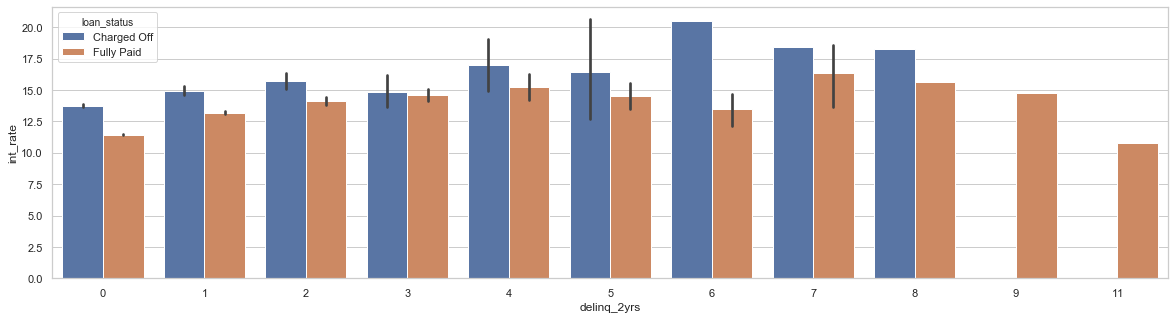

In [78]:
plt.figure(figsize=(20,5))
sns.barplot(x="delinq_2yrs", y="int_rate", hue="loan_status", data=loan_clean)
plt.show()
#insights:we can see that deling is directly corelated to int_rate


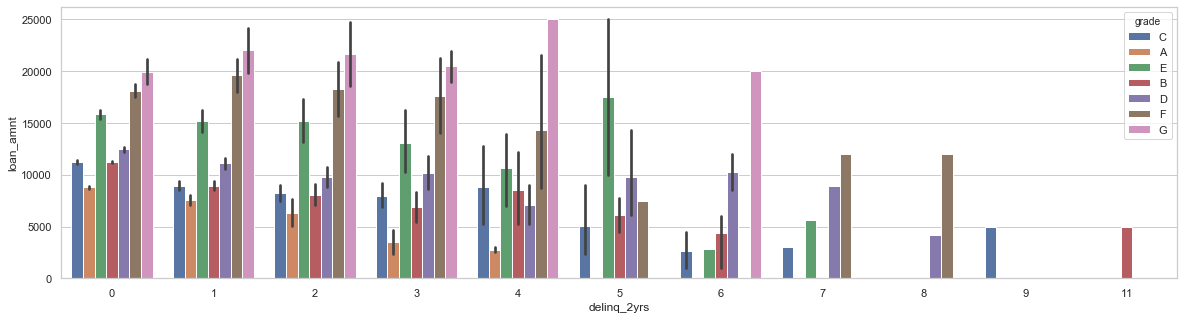

In [79]:
#revol_util vs Grade, deling_2yrs v/s loan_amnt
plt.figure(figsize=(20,5))
sns.barplot(x="delinq_2yrs", y="loan_amnt", hue="grade", data=loan_clean)
plt.show()
#insight: we can see that for the borrowers having grater then 2 deling, approved loan amount is decreasing.

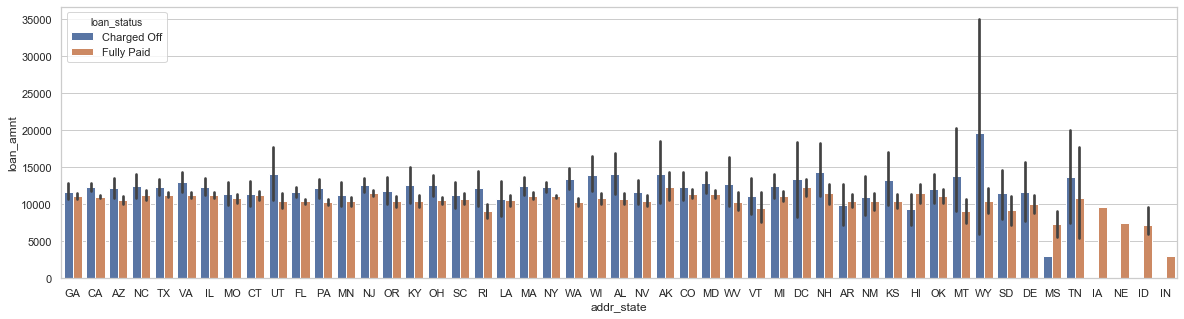

In [80]:
#Loan amount Vs addr_state vs loan Status
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_clean)
plt.show()

#Insight: WY state is having the highest charged loan amount which is clearly outlier from this graph. LC needs to investigate on this


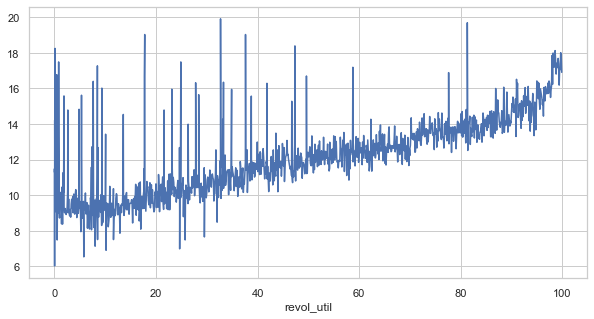

In [81]:
#Interest Rate vs Revol Util
plt.figure(figsize=[10,5])
loan_clean.groupby(['revol_util'])['int_rate'].mean().plot()
plt.show()

#We can see that revol_util and interest rate are clearly corelated.

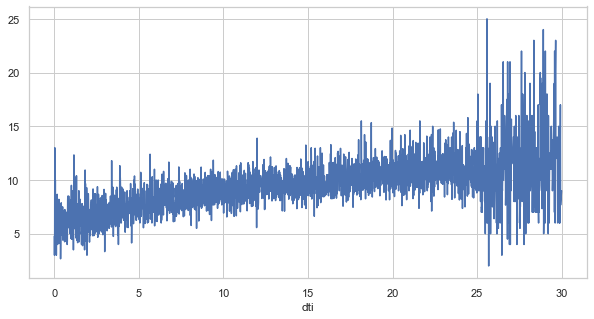

In [82]:
#DTI vs Open_Acc
plt.figure(figsize=[10,5])
loan_clean.groupby(['dti'])['open_acc'].mean().plot()
plt.show()
#insights: We can see that DTI and Open_Acc are also directly correlated


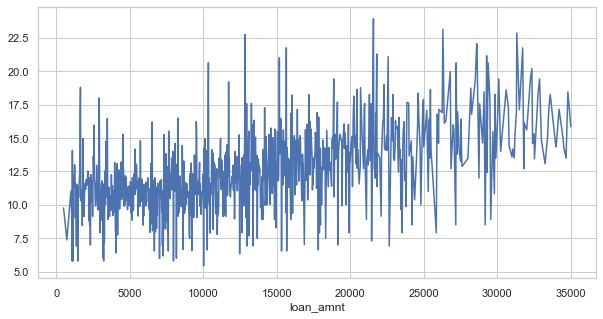

In [83]:
#Interest int_rate and loan_amnt
plt.figure(figsize=[10,5])
loan_clean.groupby(['loan_amnt'])['int_rate'].mean().plot()
plt.show()
#insights: We can clearly see that loan amount increases with interest rate

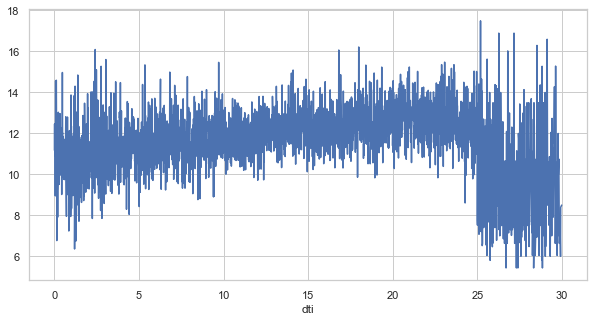

In [84]:
#Interest int_rate and dti
plt.figure(figsize=[10,5])
loan_clean.groupby(['dti'])['int_rate'].mean().plot()
plt.show()
#insights: DTI increases as Interest Rate Increases

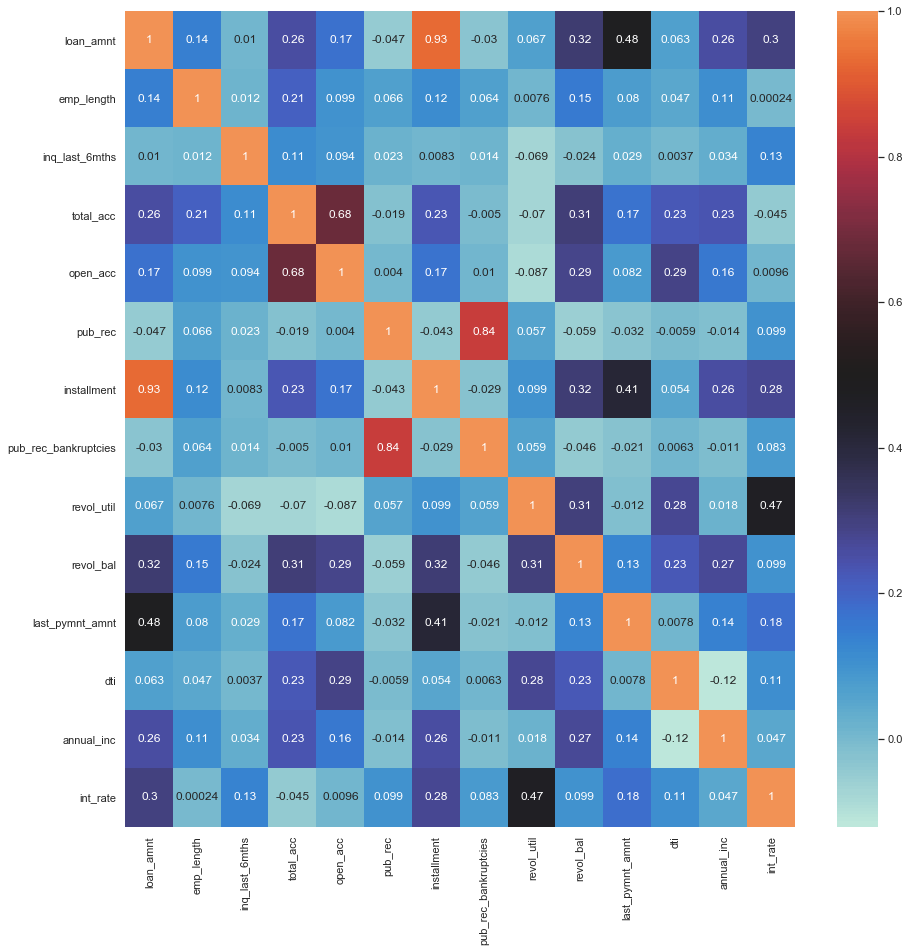

In [85]:
#plotting heat map
corr=loan_clean.corr()
corr['loan_amnt']

plt.figure(figsize=(15,15))


con_vari = ['loan_amnt','emp_length','inq_last_6mths','earliest_cr_line','last_pymnt_d',
            'total_acc','open_acc','pub_rec','installment','pub_rec_bankruptcies',
            'revol_util','revol_bal','last_pymnt_amnt','dti','annual_inc','int_rate']
corr = loan_clean[con_vari].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()
#insights:
#1)the loan amount is directly correlated to installment, int_rate,revol_bal,last_payment_amnt,annual_inc
#2) total_acc is negatively correlated with int_rate(minor), directly correlated to revol_bal, dti, installment, loan_amnt
#and highely corrated with open_acc
#3)pub_rec and pub_rec_bankrupty are direclly correlated